# AI Fraud Detection


Dataset used: https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

Rows of the dataset:

- Index: the index number of a row
- Address: the address of the ethereum account
- FLAG: whether the transaction is fraud or not
- Avg min between sent tnx: Average time between sent transactions for account in minutes
- Avg min between received tnx: Average time between received transactions for account in minutes
- Time Diff between first and_last (Mins): Time difference between the first and last transaction
- Sent_tnx: Total number of sent normal transactions
- Received_tnx: Total number of received normal transactions
- NumberofCreated_Contracts: Total Number of created contract transactions
- UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transaction
- UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions
- MinValueReceived: Minimum value in Ether ever received
- MaxValueReceived: Maximum value in Ether ever received
- AvgValueReceived5Average value in Ether ever received
- MinValSent: Minimum value of Ether ever sent
- MaxValSent: Maximum value of Ether ever sent
- AvgValSent: Average value of Ether ever sent
- MinValueSentToContract: Minimum value of Ether sent to a contract
- MaxValueSentToContract: Maximum value of Ether sent to a contract
- AvgValueSentToContract: Average value of Ether sent to contracts
- TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions
- TotalEtherSent:Total Ether sent for account address
- TotalEtherReceived: Total Ether received for account address
- TotalEtherSent_Contracts: Total Ether sent to Contract addresses
- TotalEtherBalance: Total Ether Balance following enacted transactions
- TotalERC20Tnxs: Total number of ERC20 token transfer transactions
- ERC20TotalEther_Received: Total ERC20 token received transactions in Ether
- ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether
- ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether
- ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses
- ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses
- ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses
- ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes
- ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes
- ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions
- ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account
- ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account
- ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account
- ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account
- ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account
- ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account
- ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred
- RC20UniqRecTokenName: Number of Unique ERC20 tokens received
- ERC20MostSentTokenType: Most sent token for account via ERC20 transaction
- ERC20MostRecTokenType: Most received token for account via ERC20 transactions

In [1]:
!pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.5 MB/s eta 0:00:00


In [2]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import ADASYN
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import warnings
import time

warnings.filterwarnings("ignore")

In [3]:
# Read dataset
dataset = pd.read_csv("./transaction_dataset.csv")
dataset.shape

(9841, 51)

In [4]:
# Drop duplicates and dummy unnamed column.
dataset.drop_duplicates(subset=None, inplace=True)
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset.isnull().sum()
dataset.shape

(9841, 50)

In [5]:
dataset.describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


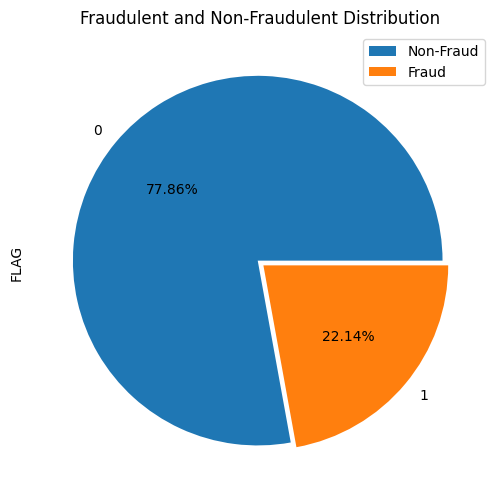

In [6]:
column = dataset.columns
dataset['FLAG'].value_counts()
round(100 * dataset['FLAG'].value_counts(normalize=True), 2).plot(kind='pie', explode=[0.02]*2, figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

In [7]:
# Replace missings of numerical variables with median
dataset.fillna(dataset.median(), inplace=True)

 # Cleaning the categorical feature - changing 0 values to null, cause a 0 value
 # doesnt mean anything in categorical features
dataset[' ERC20_most_rec_token_type'].replace({'0':np.NaN}, inplace = True)
dataset[' ERC20 most sent token type'].replace({'0':np.NaN}, inplace = True)

# Find the percentage of null values in each column
round((dataset.isnull().sum()/len(dataset.index))*100,2)

Index                                                    0.00
Address                                                  0.00
FLAG                                                     0.00
Avg min between sent tnx                                 0.00
Avg min between received tnx                             0.00
Time Diff between first and last (Mins)                  0.00
Sent tnx                                                 0.00
Received Tnx                                             0.00
Number of Created Contracts                              0.00
Unique Received From Addresses                           0.00
Unique Sent To Addresses                                 0.00
min value received                                       0.00
max value received                                       0.00
avg val received                                         0.00
min val sent                                             0.00
max val sent                                             0.00
avg val 

In [8]:
# Drop the columns 'ERC20 most sent token type' and 'ERC20_most_rec_token_type'
# as they have many null, 0, None values
dataset.drop(['Index',' ERC20_most_rec_token_type',' ERC20 most sent token type'], axis=1, inplace=True)
# These columns have no value so drop them
dataset.drop([' ERC20 avg time between sent tnx',' ERC20 avg time between rec tnx',' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx',' ERC20 min val sent contract',' ERC20 max val sent contract',' ERC20 avg val sent contract'], axis=1, inplace=True)

In [10]:
corr = dataset.corr()
# Upper triangle of correlations
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,NaN,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-0.011148,-0.052473,0.004434,-0.005510,0.003132,0.019023,0.018770,0.018835,-0.026290,-0.052603
Avg min between sent tnx,NaN,NaN,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-0.011862,0.047946,0.004998,-0.002260,-0.002829,-0.001511,-0.001841,-0.001792,0.003310,0.049548
Avg min between received tnx,NaN,NaN,NaN,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-0.013750,-0.011693,-0.007794,-0.003326,-0.005241,-0.003545,-0.003568,-0.003521,-0.016831,-0.011684
Time Diff between first and last (Mins),NaN,NaN,NaN,NaN,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,0.022216,0.324088,-0.008921,0.046278,0.049160,-0.006174,-0.005606,-0.006148,0.269025,0.329237
Sent tnx,NaN,NaN,NaN,NaN,NaN,0.198455,0.320603,0.130064,0.670014,0.024015,...,-0.007671,0.221971,-0.003480,0.004445,0.009104,-0.001407,-0.000870,-0.001271,0.082239,0.222945


In [14]:
# Drop columns beyond correlation threshold
threshold=0.7
to_drop = [column for column in upper.columns if (any(upper[column] > threshold) or any(upper[column] < -(threshold)))]
dataset.drop(to_drop, axis=1, inplace=True)
to_drop

['avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total ether received',
 'total ether sent contracts',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 max val rec',
 ' ERC20 avg val rec',
 ' ERC20 min val sent',
 ' ERC20 max val sent',
 ' ERC20 avg val sent',
 ' ERC20 uniq sent token name',
 ' ERC20 uniq rec token name']

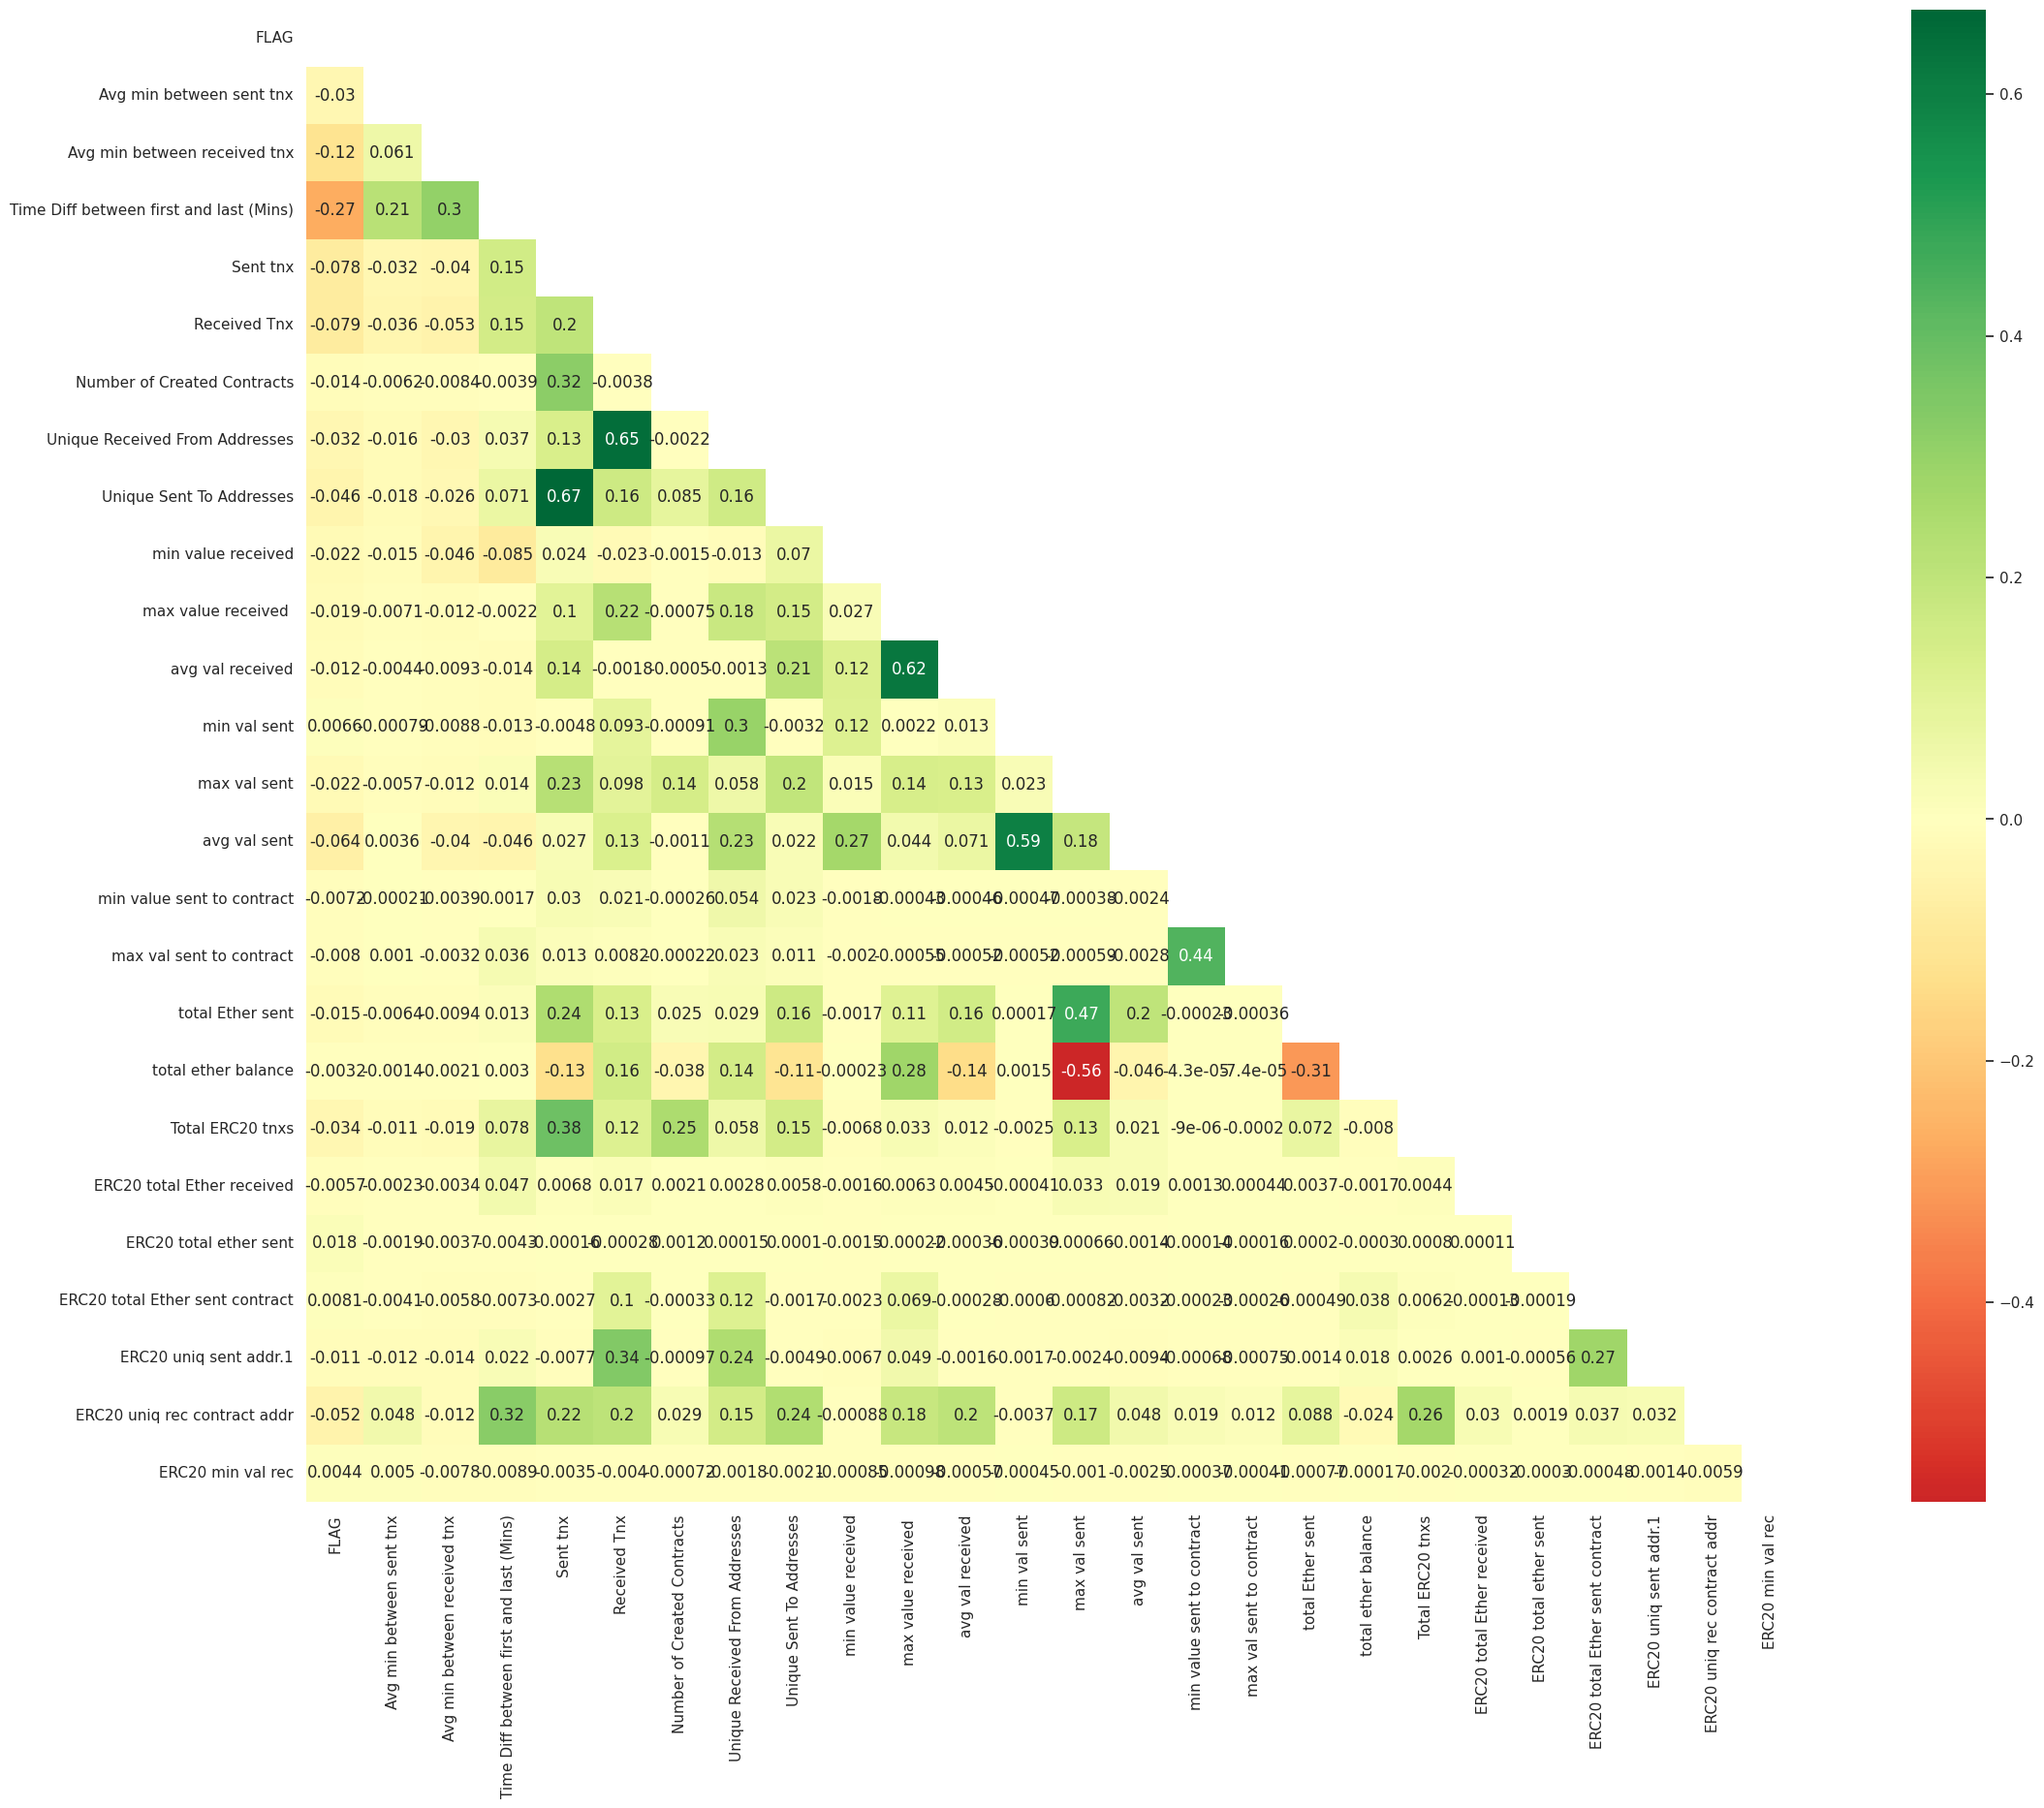

In [15]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='RdYlGn', center=0, square=True,fmt='.2g')

In [16]:
y = dataset['FLAG']
X = dataset.drop(['FLAG','Address'], axis=1)
train_size = 0.8
val_size = 0.1
test_size = 0.1
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size)
relative_train_size = train_size / (val_size + train_size)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
train_size = relative_train_size, test_size = 1-relative_train_size)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((7872, 25), (7872,), (985, 25), (985,), (984, 25), (984,))

In [17]:
X_train.columns

Index(['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'total Ether sent', 'total ether balance', ' Total ERC20 tnxs',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr.1',
       ' ERC20 uniq rec contract addr', ' ERC20 min val rec'],
      dtype='object')

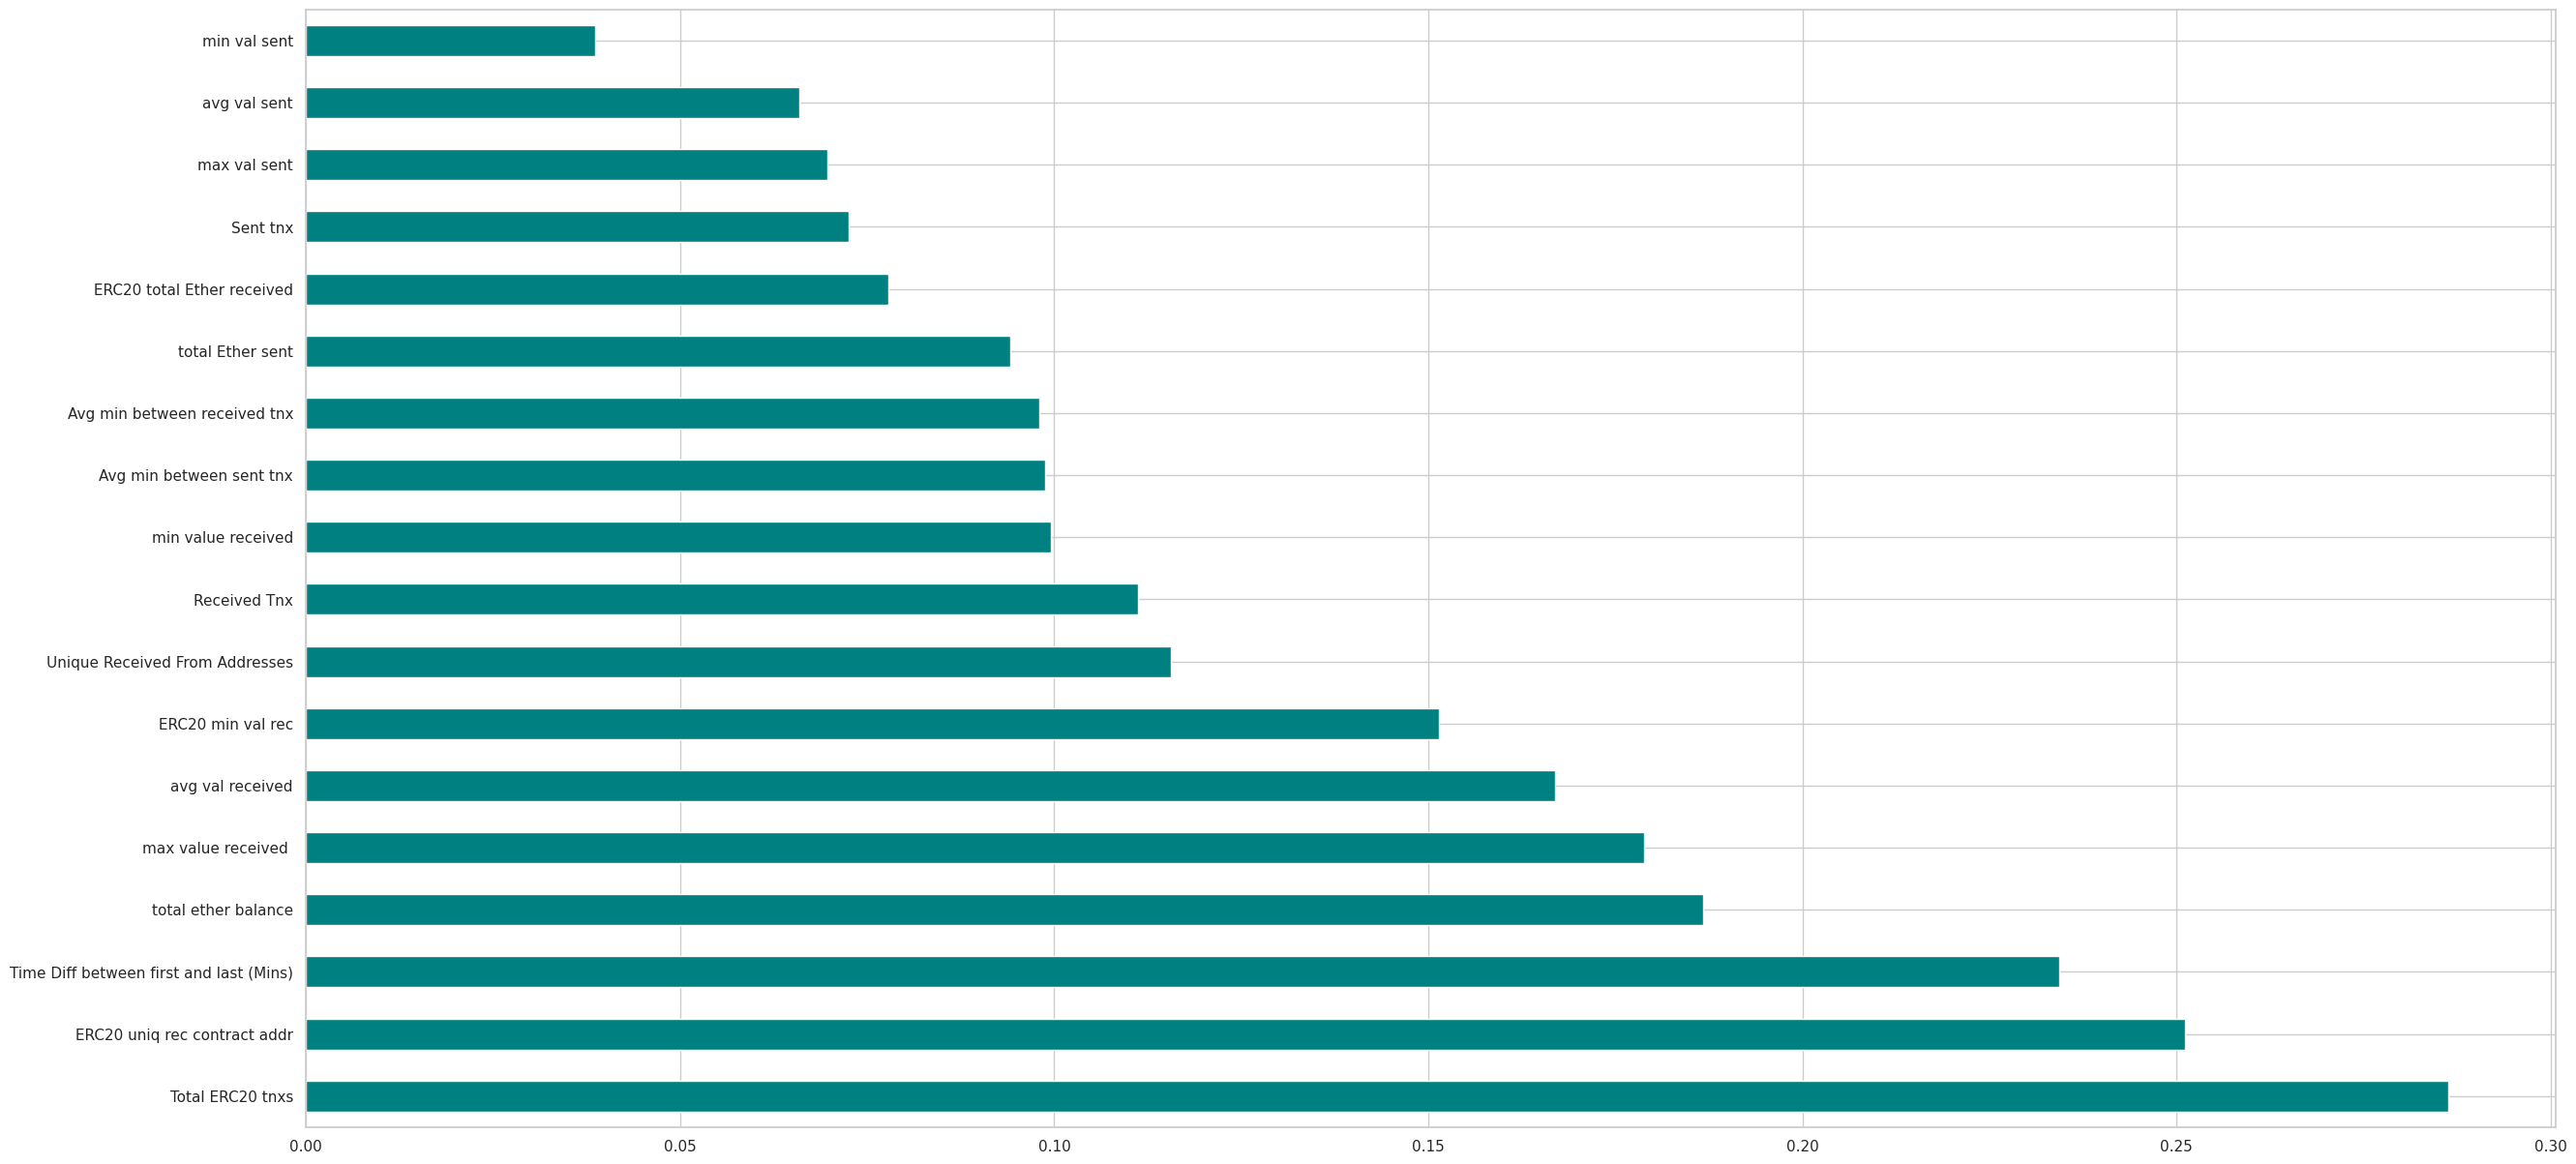

In [18]:
importance=mutual_info_classif(X_train,y_train)
feat_importances=pd.Series(importance,X_train.columns[0:len(X_train.columns)])
plt.figure(figsize=[30,15])

feat_importances.nlargest(18).plot(kind='barh',color='teal',)
plt.show()

In [19]:
col_x = feat_importances.nlargest(18).index
X_train = X_train[col_x]
X_val = X_val[col_x]
X_test = X_test[col_x]
feat_importances

Avg min between sent tnx                   0.098769
Avg min between received tnx               0.098037
Time Diff between first and last (Mins)    0.234259
Sent tnx                                   0.072505
Received Tnx                               0.111212
Number of Created Contracts                0.003347
Unique Received From Addresses             0.115630
Unique Sent To Addresses                   0.034037
min value received                         0.099589
max value received                         0.178797
avg val received                           0.166987
min val sent                               0.038666
max val sent                               0.069635
avg val sent                               0.065913
min value sent to contract                 0.006424
max val sent to contract                   0.000261
total Ether sent                           0.094067
total ether balance                        0.186653
 Total ERC20 tnxs                          0.286353
 ERC20 total

In [20]:
# Make data distributions more Gaussian-like using PowerTransformer
scaler = PowerTransformer()

X_train[col_x] = scaler.fit_transform(X_train[col_x])
X_val[col_x] = scaler.transform(X_val[col_x])
X_test[col_x] = scaler.transform(X_test[col_x])
X_train.head()

,Total ERC20 tnxs,ERC20 uniq rec contract addr,Time Diff between first and last (Mins),total ether balance,max value received,avg val received,ERC20 min val rec,Unique Received From Addresses,Received Tnx,min value received,Avg min between sent tnx,Avg min between received tnx,total Ether sent,ERC20 total Ether received,Sent tnx,max val sent,avg val sent,min val sent
8813,0.145845,0.242427,-1.646659,0.000853,-1.406491,-1.282932,-0.49828,-2.271657,-1.798789,-0.779834,-1.102419,-1.189344,-1.254667,-0.740208,-1.401677,-1.209567,-1.139057,-0.814948
662,-0.976504,-0.989972,-1.533679,0.000853,-0.150301,0.339147,-0.49828,-0.848865,-1.009773,1.246622,-1.102419,-1.189344,-0.306302,-0.740208,-0.599410,-0.041310,0.412371,1.759654
7077,-0.976504,-0.989972,-1.316652,0.000853,-0.866986,-0.526074,-0.49828,-0.848865,-1.009773,0.352361,-1.102419,-1.189344,-0.861409,-0.740208,-0.599410,-0.708667,-0.421886,0.963440
4279,-0.976504,-0.989972,1.018817,0.000854,-0.866229,-1.110574,-0.49828,0.171703,1.140279,-0.746782,-0.499209,0.972458,-0.092615,-0.740208,1.388887,-0.707362,-0.973951,-0.753015
6743,-0.976504,-0.989972,-1.158718,0.000853,0.879045,1.288693,-0.49828,-0.211186,-0.619615,1.768630,0.200451,-1.089501,0.803724,-0.740208,-0.214299,0.983604,1.350933,1.941279


In [26]:
# Address imbalance using SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy='minority',random_state=100)
X_train, y_train = sm.fit_resample(X_train, y_train)
print (X_train.shape)
print (y_train.shape)
print (y_train.value_counts())

(12216, 18)
(12216,)
1    6108
0    6108
Name: FLAG, dtype: int64


In [27]:
def draw_roc(actual, probs):
  fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                            drop_intermediate = False )
  auc_score = metrics.roc_auc_score( actual, probs )
  plt.figure(figsize=(5, 5))
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

  return None

def model_metrics(r,a, p):
  confusion = confusion_matrix(a, p)
  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print ('Accuracy    : ', metrics.accuracy_score(a, p ))
  print ('Sensitivity : ', TP / float(TP+FN))
  print ('Specificity : ', TN / float(TN+FP))
  print ('Precision   : ', TP / float(TP + FP))
  print ('Recall      : ', TP / float(TP + FN))
  print('F1_score:',metrics.f1_score(a,p))
  print(confusion)
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=r.classes_)
  disp.plot()
  plt.grid(False)
  plt.show()
  return None

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  LogisticRegression(C=21544.346900318822)
best parameters:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
best score:  0.9843266909446935
------- 2.5027782917022705 seconds -------



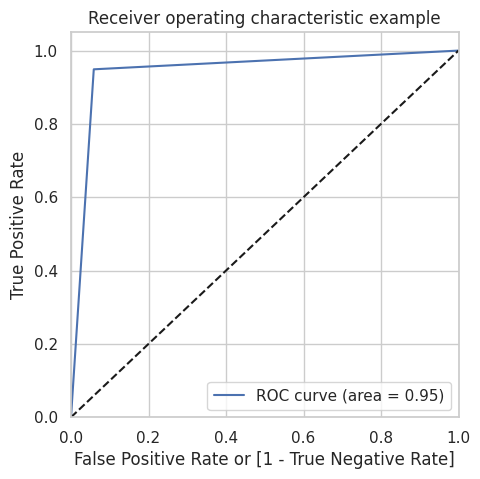

Training AUC: 0.9450720366732155
Accuracy    :  0.9450720366732155
Sensitivity :  0.9489194499017681
Specificity :  0.9412246234446627
Precision   :  0.9416734362307068
Recall      :  0.9489194499017681
F1_score: 0.9452825572861454
[[5749  359]
 [ 312 5796]]


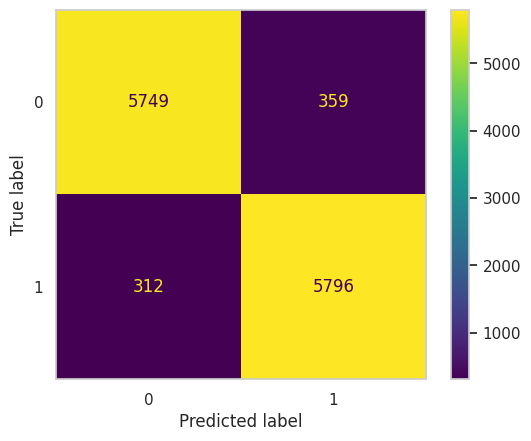

Validation AUC: 0.940025457358924


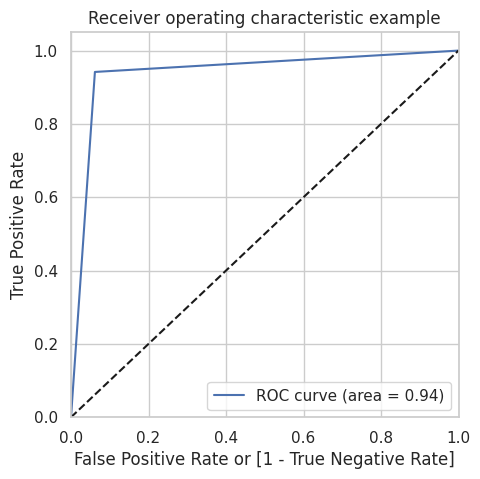

Accuracy    :  0.9390243902439024
Sensitivity :  0.941747572815534
Specificity :  0.9383033419023136
Precision   :  0.8016528925619835
Recall      :  0.941747572815534
F1_score: 0.8660714285714285
[[730  48]
 [ 12 194]]


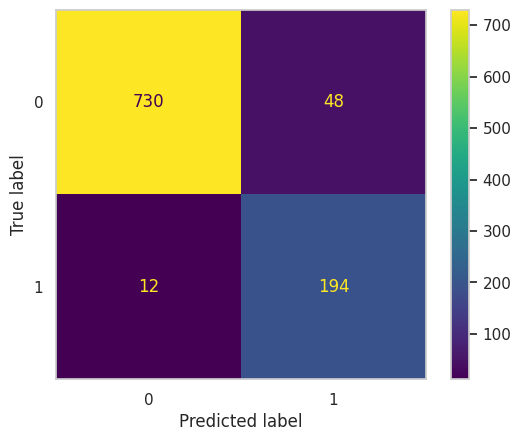

In [28]:
# Logistic Regression
start_time = time.time()
rcv = RandomizedSearchCV(LogisticRegression(), {'C': np.logspace(-1, 5, 10), 'class_weight': [None,'balanced'], 'penalty': ['l1','l2']}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=20,
                       min_samples_split=100, random_state=23)
best parameters:  {'min_samples_split': 100, 'min_samples_leaf': 20, 'max_depth': 100, 'criterion': 'entropy'}
best score:  0.9920381868440824
------- 11.800337076187134 seconds -------



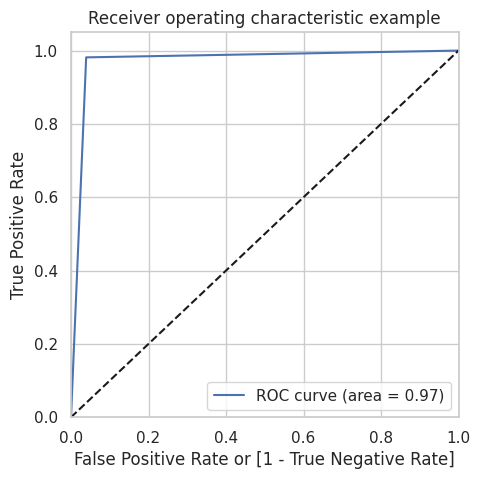

Training AUC: 0.971185330713818
Accuracy    :  0.971185330713818
Sensitivity :  0.9814996725605762
Specificity :  0.9608709888670596
Precision   :  0.9616618543471287
Recall      :  0.9814996725605762
F1_score: 0.9714795008912656
[[5869  239]
 [ 113 5995]]


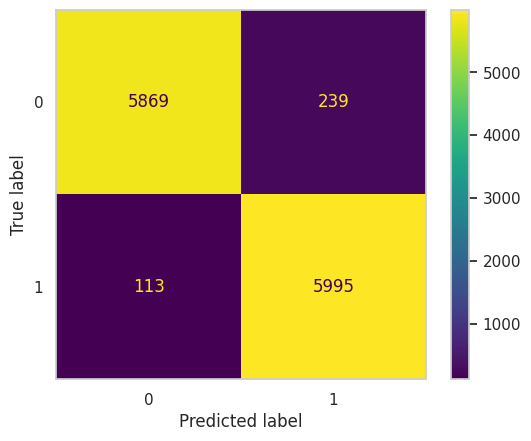

Validation AUC: 0.9606596450944668


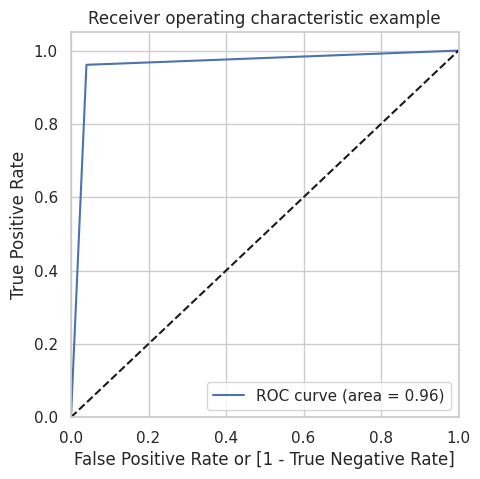

Accuracy    :  0.9603658536585366
Sensitivity :  0.9611650485436893
Specificity :  0.9601542416452442
Precision   :  0.8646288209606987
Recall      :  0.9611650485436893
F1_score: 0.9103448275862069
[[747  31]
 [  8 198]]


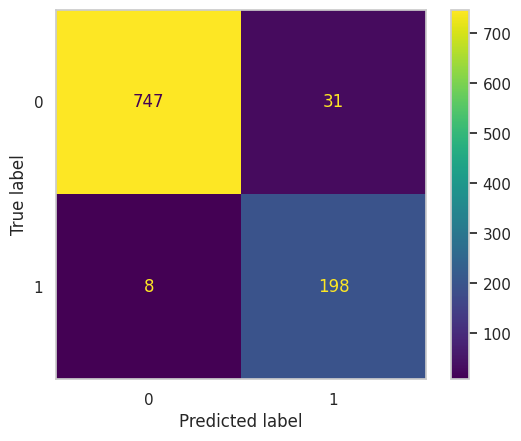

In [29]:
# Decision Tree
start_time = time.time()
rcv = RandomizedSearchCV(DecisionTreeClassifier(random_state = 23), {'max_depth': [10, 20, 50, 100, 200],'min_samples_leaf': [10, 20, 50, 100, 200],'min_samples_split': [10, 20, 50, 100, 200],'criterion': ["gini", "entropy"]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  RandomForestClassifier(max_depth=10, max_features=0.3, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=12, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 12, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 0.3, 'max_depth': 10, 'criterion': 'gini'}
best score:  0.9958371503871255
------- 24.52930498123169 seconds -------



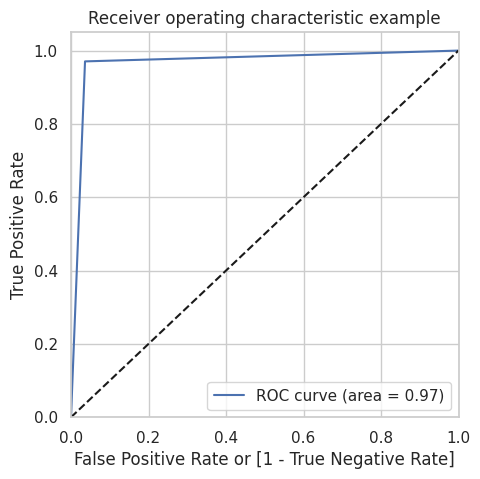

Training AUC: 0.9671741977734118
Accuracy    :  0.967174197773412
Sensitivity :  0.9705304518664047
Specificity :  0.9638179436804192
Precision   :  0.9640591966173362
Recall      :  0.9705304518664047
F1_score: 0.9672840009790324
[[5887  221]
 [ 180 5928]]


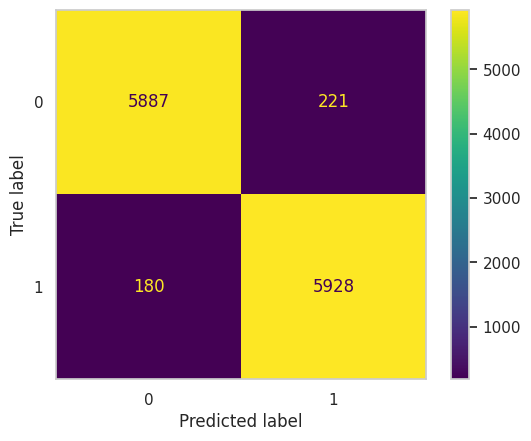

Validation AUC: 0.9582324606284474


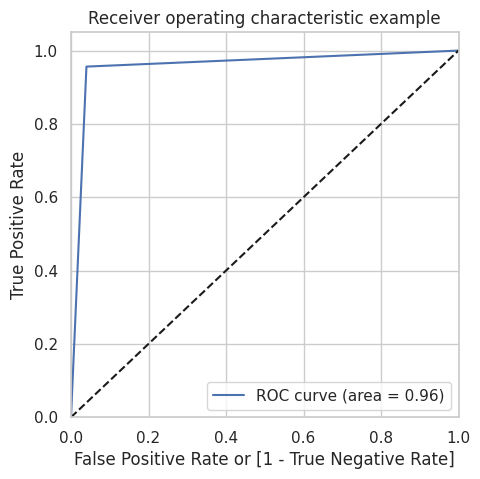

Accuracy    :  0.959349593495935
Sensitivity :  0.9563106796116505
Specificity :  0.9601542416452442
Precision   :  0.8640350877192983
Recall      :  0.9563106796116505
F1_score: 0.9078341013824887
[[747  31]
 [  9 197]]


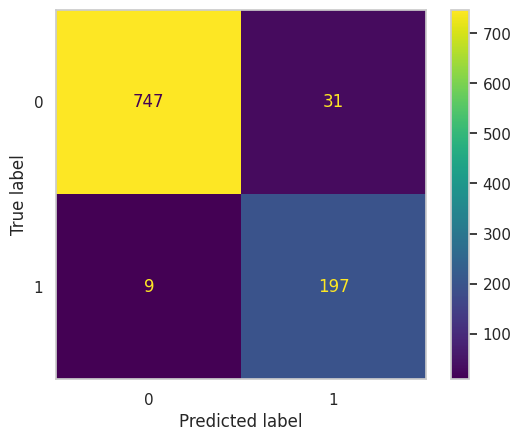

In [30]:
# Random Forest
start_time = time.time()
rcv = RandomizedSearchCV(RandomForestClassifier(oob_score = True, random_state=23), {'n_estimators': [10,12,15],'max_features':['sqrt',0.3],'max_depth': [10,50],'min_samples_leaf': [50,200],'min_samples_split': [50,100],'criterion': ["gini"]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)
best parameters:  {'subsample': 0.9, 'n_estimators': 200, 'max_features': 14, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.5}
best score

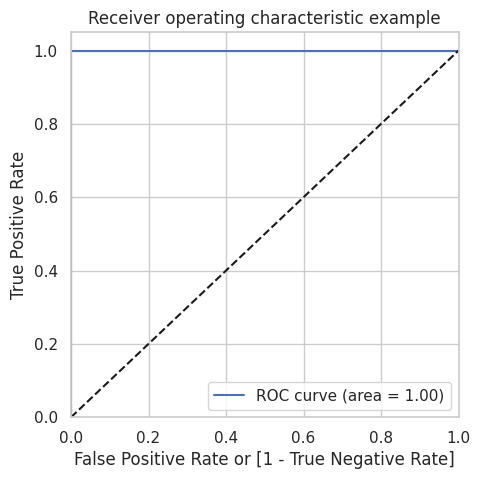

Training AUC: 1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Precision   :  1.0
Recall      :  1.0
F1_score: 1.0
[[6108    0]
 [   0 6108]]


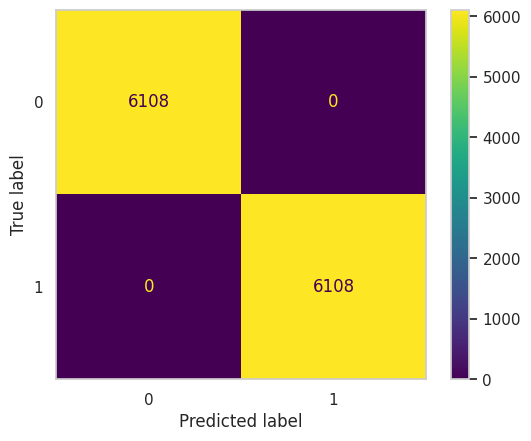

Validation AUC: 0.9809381785509272


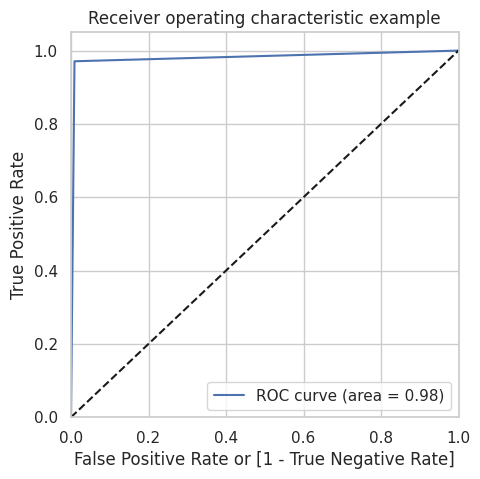

Accuracy    :  0.9867886178861789
Sensitivity :  0.970873786407767
Specificity :  0.9910025706940874
Precision   :  0.966183574879227
Recall      :  0.970873786407767
F1_score: 0.9685230024213075
[[771   7]
 [  6 200]]


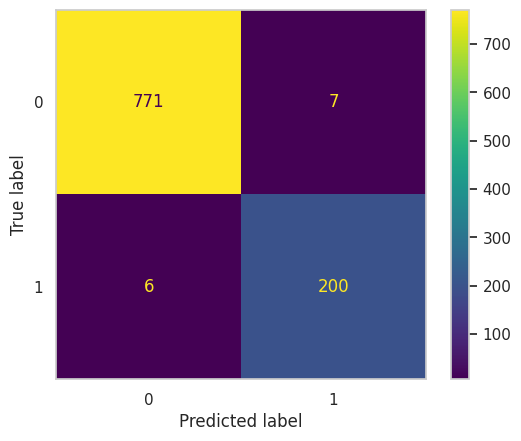

In [31]:
# XGBoost
!pip install xgboost
import xgboost as xgb

start_time = time.time()
rcv = RandomizedSearchCV(xgb.XGBClassifier(), {'learning_rate':[0.01,0.1,0.3,0.5,0.7],'max_depth':[2,3,4,10],'n_estimators':[10,15,20,50,100,200],'subsample':[0.3, 0.5, 0.9],'colsample_bytree':[0.3,0.5,0.7],'max_features':[8,10,14,16]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  AdaBoostClassifier(learning_rate=0.3)
best parameters:  {'n_estimators': 50, 'learning_rate': 0.3}
best score:  0.9947563376764365
------- 48.948010206222534 seconds -------



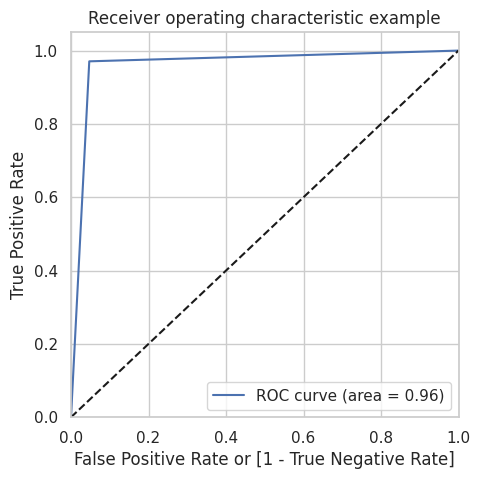

Training AUC: 0.9617714472822527
Accuracy    :  0.9617714472822528
Sensitivity :  0.970694171578258
Specificity :  0.9528487229862476
Precision   :  0.9536754061444427
Recall      :  0.970694171578258
F1_score: 0.9621095334685598
[[5820  288]
 [ 179 5929]]


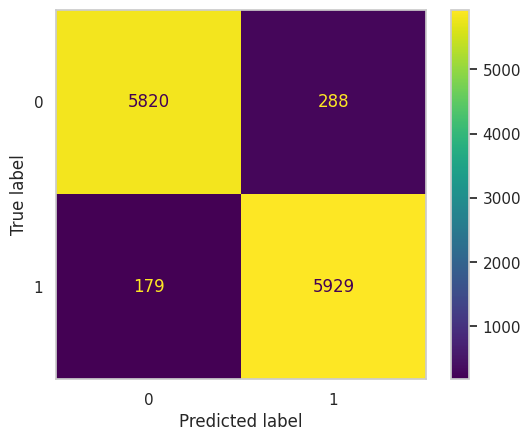

Validation AUC: 0.9574462774852123


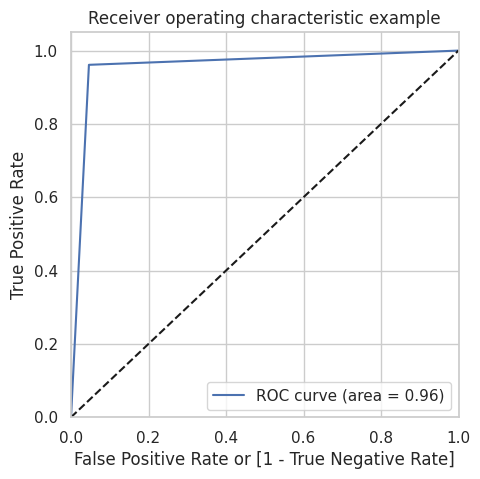

Accuracy    :  0.9552845528455285
Sensitivity :  0.9611650485436893
Specificity :  0.9537275064267352
Precision   :  0.8461538461538461
Recall      :  0.9611650485436893
F1_score: 0.9
[[742  36]
 [  8 198]]


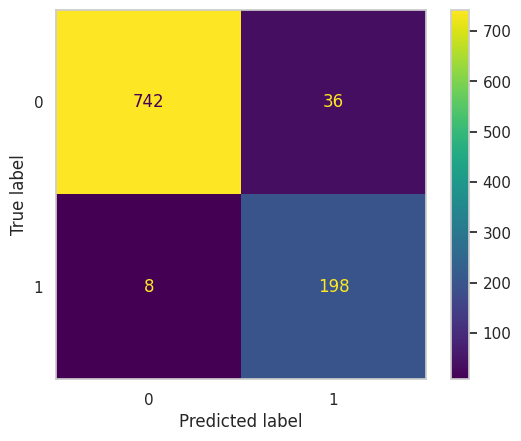

In [32]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
rcv = RandomizedSearchCV(AdaBoostClassifier(), {'learning_rate': [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2,0.3,0.5,0.7],'n_estimators': [2,5,8,10,15,20,50]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  GradientBoostingClassifier(learning_rate=0.5, n_estimators=50)
best parameters:  {'n_estimators': 50, 'learning_rate': 0.5}
best score:  0.9989479571946633
------- 132.113676071167 seconds -------



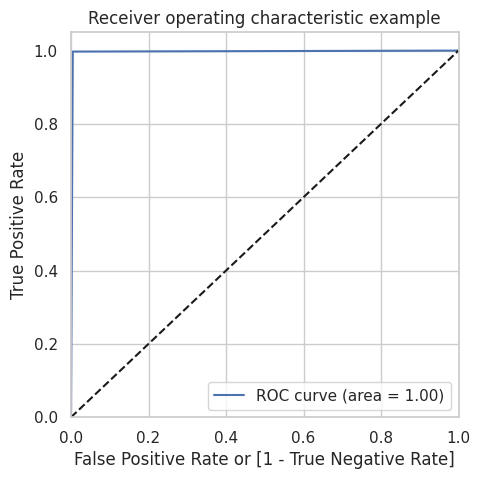

Training AUC: 0.9963163064833006
Accuracy    :  0.9963163064833006
Sensitivity :  0.9972167648984938
Specificity :  0.9954158480681073
Precision   :  0.9954240889034156
Recall      :  0.9972167648984938
F1_score: 0.9963196205119816
[[6080   28]
 [  17 6091]]


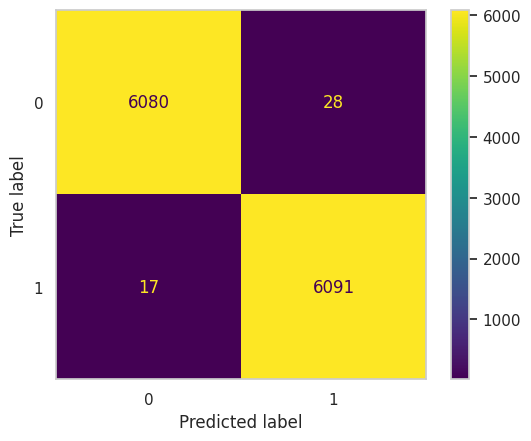

Validation AUC: 0.9819365063518606


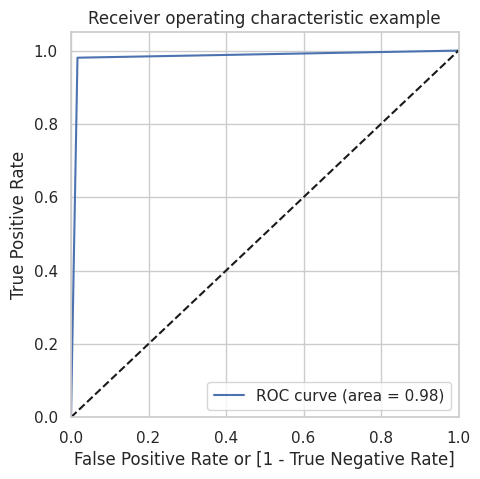

Accuracy    :  0.9827235772357723
Sensitivity :  0.9805825242718447
Specificity :  0.9832904884318766
Precision   :  0.9395348837209302
Recall      :  0.9805825242718447
F1_score: 0.9596199524940617
[[765  13]
 [  4 202]]


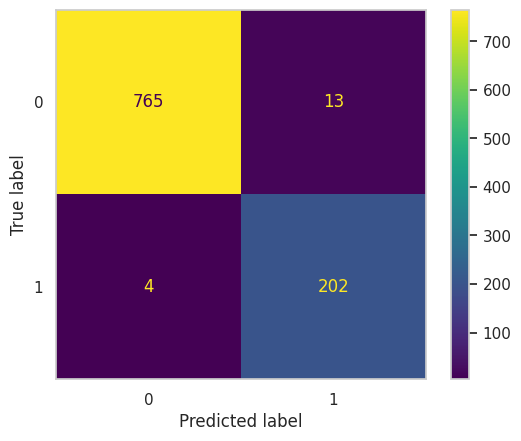

In [33]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()
rcv = RandomizedSearchCV(GradientBoostingClassifier(), {'learning_rate': [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2, 0.3, 0.5, 0.7],'n_estimators': [2, 5, 8, 10, 15, 20, 50, 100]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6108, number of negative: 6108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4588
[LightGBM] [Info] Number of data points in the train set: 12216, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--------------
best estimator :  LGBMClassifier(boosting_type='dart', colsample_bytree=0.3, n_estimators=50,
               subsample=0.5)
best parameters:  {'subsample': 0.5, 'n_estimators': 50, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'boosting_type': 'dart'}
best score:  0.998803071114337
------- 24.40481734275818 seconds -------



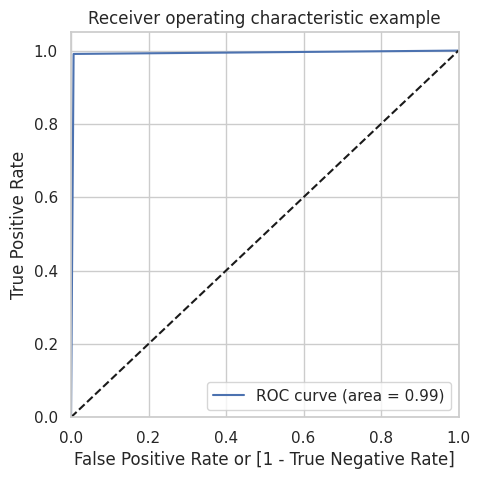

Training AUC: 0.9920595939751147
Accuracy    :  0.9920595939751146
Sensitivity :  0.9908316961362148
Specificity :  0.9932874918140144
Precision   :  0.9932709666830789
Recall      :  0.9908316961362148
F1_score: 0.9920498319809851
[[6067   41]
 [  56 6052]]


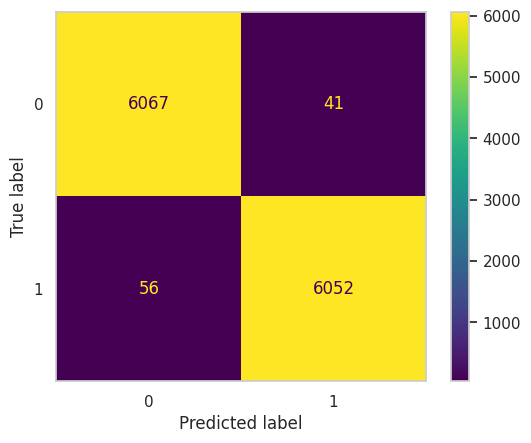

Validation AUC: 0.9709424214440812


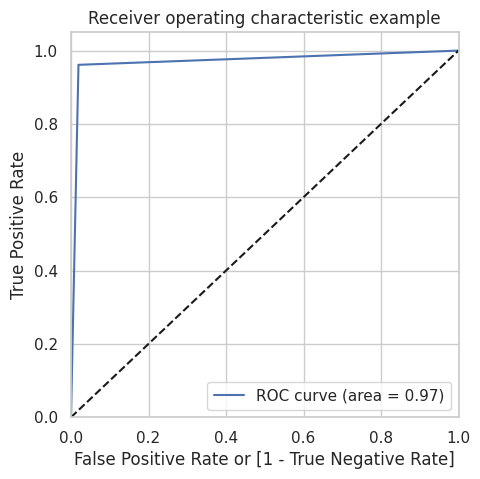

Accuracy    :  0.9766260162601627
Sensitivity :  0.9611650485436893
Specificity :  0.980719794344473
Precision   :  0.9295774647887324
Recall      :  0.9611650485436893
F1_score: 0.9451073985680191
[[763  15]
 [  8 198]]


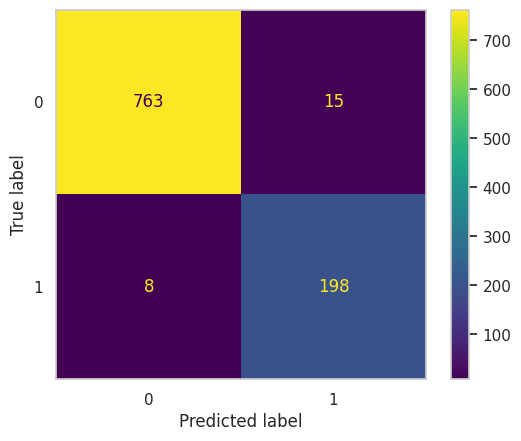

In [34]:
# Light Gradient Boosting
from lightgbm import LGBMClassifier

start_time = time.time()
rcv = RandomizedSearchCV(LGBMClassifier(), {'boosting_type':['gbdt','dart','rf'],'learning_rate':[0.0001, 0.01, 0.1, 1.0, 1.1, 1.2,0.3,0.5,0.7],'n_estimators':[2,5,8,10,15,20,50,100,200],'subsample':[0.3, 0.5, 0.9],'max_depth':[-1,2,3,4,5,10],'colsample_bytree':[0.3,0.5,0.7,1.]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.4 MB/s eta 0:00:00
Fitting 10 folds for each of 10 candidates, totalling 100 fits
0:	learn: 0.3510418	total: 49.8ms	remaining: 4.93s
1:	learn: 0.2488802	total: 52.4ms	remaining: 2.57s
2:	learn: 0.1979591	total: 55ms	remaining: 1.78s
3:	learn: 0.1648999	total: 57.4ms	remaining: 1.38s
4:	learn: 0.1467876	total: 60.2ms	remaining: 1.14s
5:	learn: 0.1315115	total: 63.1ms	remaining: 989ms
6:	learn: 0.1241631	total: 65.8ms	remaining: 874ms
7:	learn: 0.1195902	total: 68.6ms	remaining: 789ms
8:	learn: 0.1130004	total: 71.5ms	remaining: 722ms
9:	learn: 0.1100324	total: 74ms	remaining: 666ms
10:	learn: 0.0966195	total: 76.8ms	remaining: 621ms
11:	learn: 0.0932205	total: 79.3ms	remaining: 581ms
12:	learn: 0.0887155	total: 81.9ms	remaining: 548ms
13:	learn: 0.0863650	total: 84.3ms	remaining: 518ms
14:	learn: 0.0803217	total: 87ms	remaining: 493ms
15:	learn: 0.0779136	total: 89.7ms	remaining: 471ms
16:	learn: 0.0748400	total: 92.4ms	remain

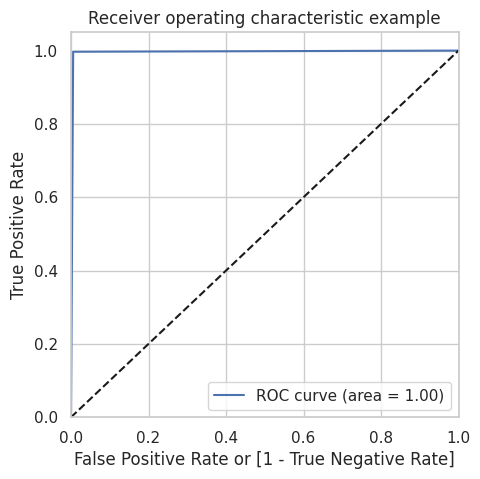

Training AUC: 0.9956614276358873
Accuracy    :  0.9956614276358874
Sensitivity :  0.9968893254747871
Specificity :  0.9944335297969875
Precision   :  0.9944471664216887
Recall      :  0.9968893254747871
F1_score: 0.9956667484261303
[[6074   34]
 [  19 6089]]


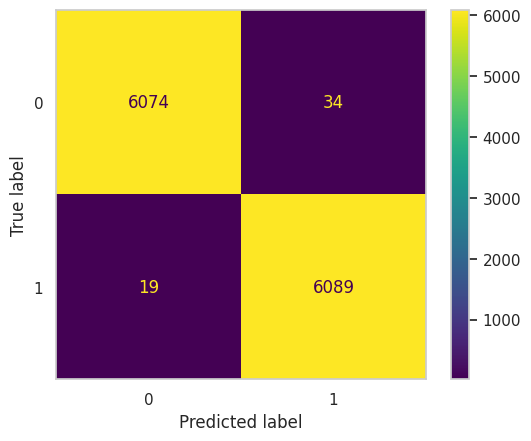

Validation AUC: 0.9838645269174133


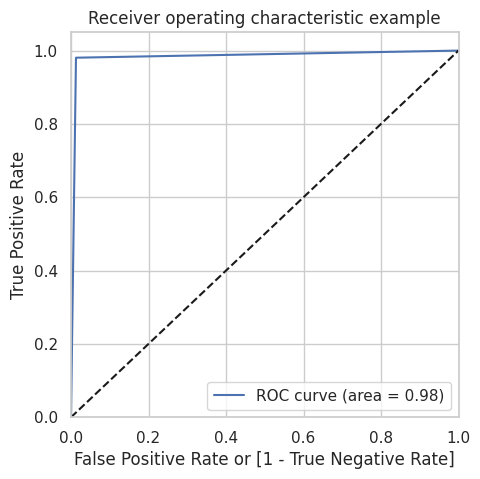

Accuracy    :  0.9857723577235772
Sensitivity :  0.9805825242718447
Specificity :  0.987146529562982
Precision   :  0.9528301886792453
Recall      :  0.9805825242718447
F1_score: 0.9665071770334929
[[768  10]
 [  4 202]]


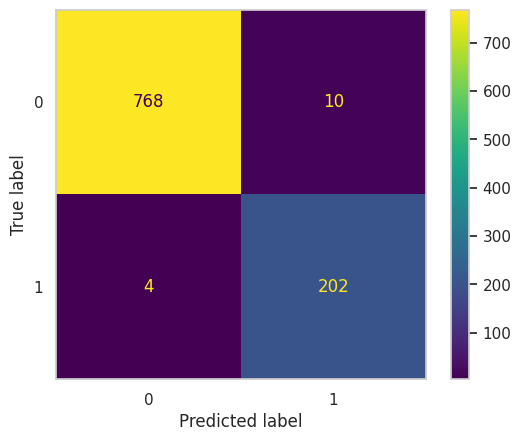

In [35]:
# Catboost
!pip install catboost
from catboost import CatBoostClassifier, Pool

start_time = time.time()
rcv = RandomizedSearchCV(CatBoostClassifier(), {'boosting_type':["Ordered","Plain"],'iterations':[100,200] ,'learning_rate':[0.0001, 0.01, 0.1, 1.0, 1.1, 1.2,0.3,0.5,0.7],'loss_function':['RMSE','Logloss','MAE','CrossEntropy','MAPE'],'subsample':[0.3, 0.5, 0.9],'depth':[-1,2,3,4,5,10]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  SVC(C=6)
best parameters:  {'kernel': 'rbf', 'C': 6}
best score:  0.9977725094050603
------- 248.52435612678528 seconds -------



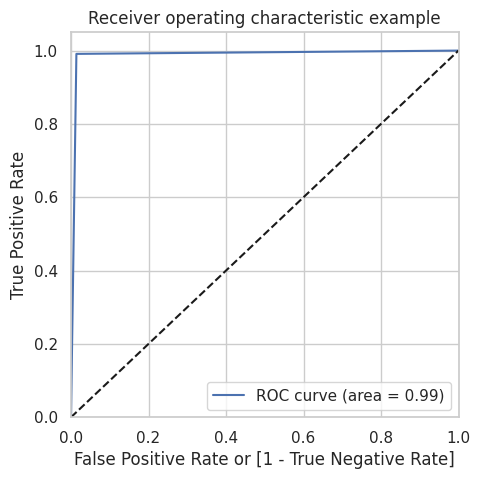

Training AUC: 0.9885396201702685
Accuracy    :  0.9885396201702685
Sensitivity :  0.9909954158480682
Specificity :  0.9860838244924689
Precision   :  0.9861518409905506
Recall      :  0.9909954158480682
F1_score: 0.988567695574065
[[6023   85]
 [  55 6053]]


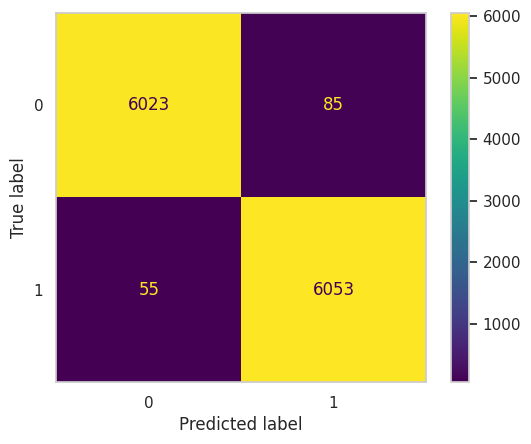

Validation AUC: 0.9702997479222303


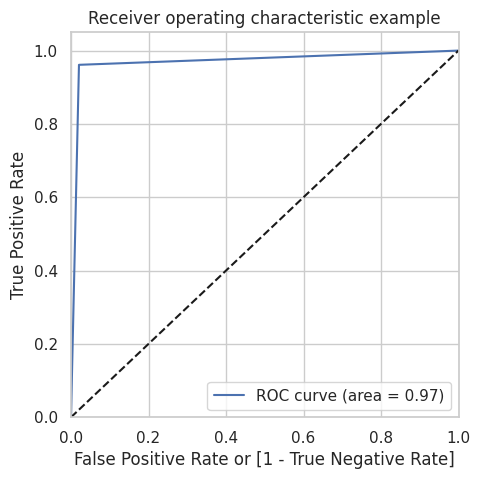

Accuracy    :  0.975609756097561
Sensitivity :  0.9611650485436893
Specificity :  0.9794344473007712
Precision   :  0.9252336448598131
Recall      :  0.9611650485436893
F1_score: 0.9428571428571428
[[762  16]
 [  8 198]]


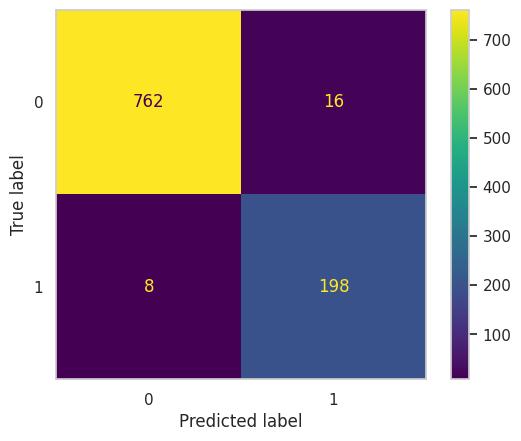

In [36]:
# Support Vector Machine Classifier
from sklearn.svm import SVC

start_time = time.time()
rcv = RandomizedSearchCV(SVC(), {'C': [i for i in range(1,10,1)],'kernel':['linear','rbf','poly']}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

--------------
best estimator :  KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=15)
best parameters:  {'n_neighbors': 15, 'n_jobs': -1, 'algorithm': 'kd_tree'}
best score:  0.9958683361363386
------- 16.77927565574646 seconds -------



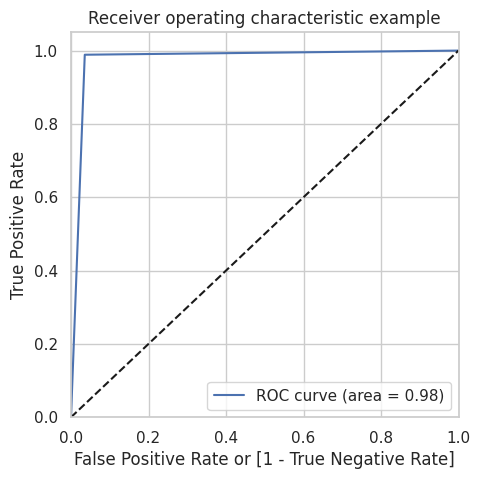

Training AUC: 0.9765880812049771
Accuracy    :  0.9765880812049771
Sensitivity :  0.9887033398821218
Specificity :  0.9644728225278324
Precision   :  0.9653132992327366
Recall      :  0.9887033398821218
F1_score: 0.9768683274021353
[[5891  217]
 [  69 6039]]


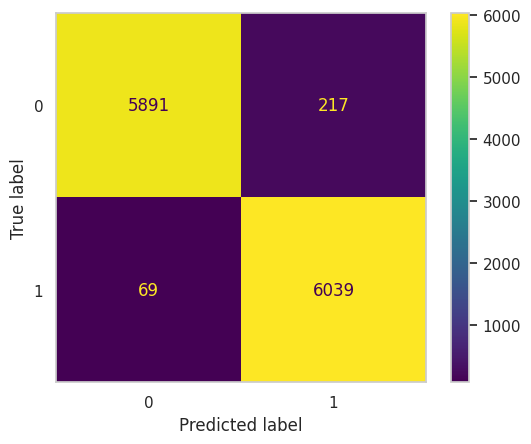

Validation AUC: 0.9627998103177178


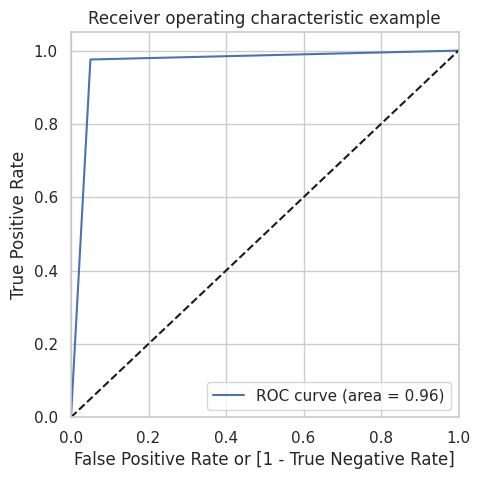

Accuracy    :  0.9552845528455285
Sensitivity :  0.9757281553398058
Specificity :  0.9498714652956298
Precision   :  0.8375
Recall      :  0.9757281553398058
F1_score: 0.9013452914798207
[[739  39]
 [  5 201]]


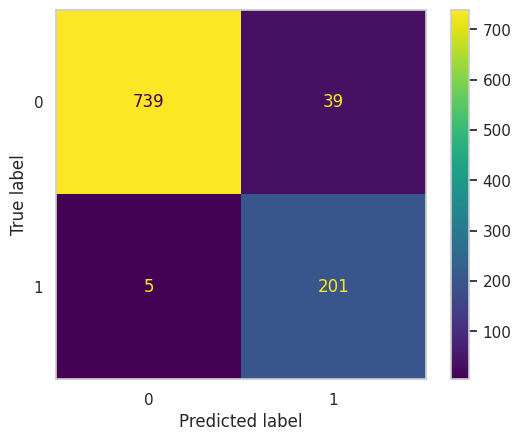

In [37]:
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
rcv = RandomizedSearchCV(KNeighborsClassifier(), {'n_neighbors': [i for i in range(1,25,1)],'algorithm':['kd_tree','auto'],'n_jobs':[-1]}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

Fitting 10 folds for each of 1 candidates, totalling 10 fits

--------------
best estimator :  GaussianNB()
best parameters:  {}
best score:  0.9076899228067296
------- 4.309231758117676 seconds -------



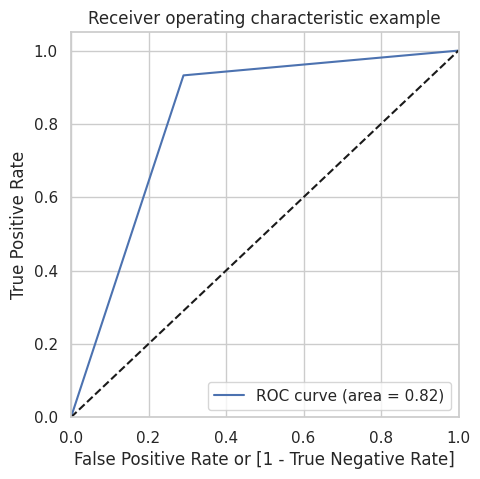

Training AUC: 0.8210543549443353
Accuracy    :  0.8210543549443353
Sensitivity :  0.9323837590045841
Specificity :  0.7097249508840865
Precision   :  0.7625870380289234
Recall      :  0.9323837590045841
F1_score: 0.83898055391868
[[4335 1773]
 [ 413 5695]]


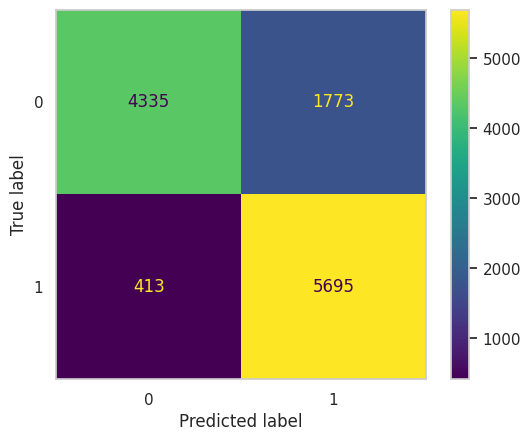

Validation AUC: 0.8222040582025107


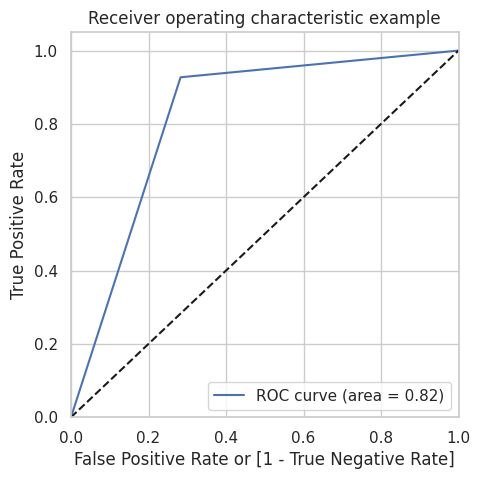

Accuracy    :  0.7611788617886179
Sensitivity :  0.9271844660194175
Specificity :  0.7172236503856041
Precision   :  0.46472019464720193
Recall      :  0.9271844660194175
F1_score: 0.6191247974068071
[[558 220]
 [ 15 191]]


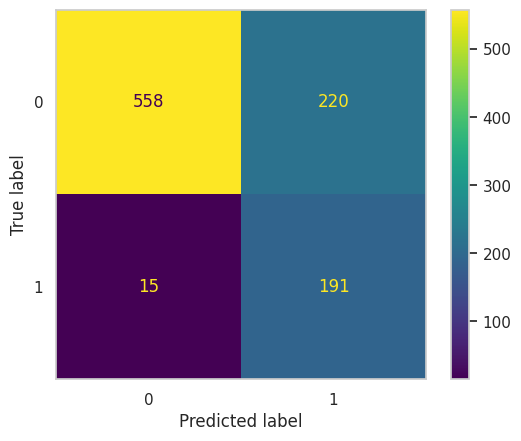

In [39]:
# Gaussian Naivebayes
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
rcv = RandomizedSearchCV(GaussianNB(), {}, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

print('\n--------------')
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('------- %s seconds -------\n' % (time.time() - start_time))
y_train_pred= (rcv.best_estimator_).predict(X_train)
y_val_pred= (rcv.best_estimator_).predict(X_val)
draw_roc(y_train, y_train_pred)
print("Training AUC: {}".format(metrics.roc_auc_score( y_train, y_train_pred)))
model_metrics(rcv,y_train, y_train_pred)
print("Validation AUC: {}".format(metrics.roc_auc_score( y_val, y_val_pred)))
draw_roc(y_val, y_val_pred)
model_metrics(rcv,y_val, y_val_pred)

## Results

| Models                  | Train AUC          | Train Accuracy     | Train Sensitivity  | Train Specificity  | Train Precision    | Train Recall       | Train F1           | Time taken to train | Test AUC           | Test Accuracy      | Test Sensitivity   | Test Specificity   | Test Precision      | Test Recall        | Test F1            |
|-------------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|---------------------|--------------------|--------------------|--------------------|--------------------|---------------------|--------------------|--------------------|
| Logistic Regression     | 0.9450720366732155 | 0.9450720366732155 | 0.9489194499017681 | 0.9412246234446627 | 0.9416734362307068 | 0.9489194499017681 | 0.9452825572861454 | 2.5027782917022705  | 0.940025457358924  | 0.9390243902439024 | 0.941747572815534  | 0.9383033419023136 | 0.8016528925619835  | 0.941747572815534  | 0.8660714285714285 |
| Decision Tree           | 0.971185330713818  | 0.971185330713818  | 0.9814996725605762 | 0.9608709888670596 | 0.9616618543471287 | 0.9814996725605762 | 0.9714795008912656 | 11.800337076187134  | 0.9606596450944668 | 0.9603658536585366 | 0.9611650485436893 | 0.9601542416452442 | 0.8646288209606987  | 0.9611650485436893 | 0.9103448275862069 |
| Random Forest           | 0.9671741977734118 | 0.967174197773412  | 0.9705304518664047 | 0.9638179436804192 | 0.9640591966173362 | 0.9705304518664047 | 0.9672840009790324 | 24.52930498123169   | 0.9582324606284474 | 0.959349593495935  | 0.9563106796116505 | 0.9601542416452442 | 0.8640350877192983  | 0.9563106796116505 | 0.9078341013824887 |
| XGBoost                 | 1.0                | 1.0                | 1.0                | 1.0                | 1.0                | 1.0                | 1.0                | 17.80846405029297   | 0.9809381785509272 | 0.9867886178861789 | 0.970873786407767  | 0.9910025706940874 | 0.966183574879227   | 0.970873786407767  | 0.9685230024213075 |
| AdaBoost                | 0.9617714472822527 | 0.9617714472822528 | 0.970694171578258  | 0.9528487229862476 | 0.9536754061444427 | 0.970694171578258  | 0.9621095334685598 | 48.948010206222534  | 0.9574462774852123 | 0.9552845528455285 | 0.9611650485436893 | 0.9537275064267352 | 0.8461538461538461  | 0.9611650485436893 | 0.9                |
| Gradient boosting       | 0.9963163064833006 | 0.9963163064833006 | 0.9972167648984938 | 0.9954158480681073 | 0.9954240889034156 | 0.9972167648984938 | 0.9963196205119816 | 132.113676071167    | 0.9819365063518606 | 0.9827235772357723 | 0.9805825242718447 | 0.9832904884318766 | 0.9395348837209302  | 0.9805825242718447 | 0.9596199524940617 |
| Light Gradient Boosting | 0.9920595939751147 | 0.9920595939751146 | 0.9908316961362148 | 0.9932874918140144 | 0.9932709666830789 | 0.9908316961362148 | 0.9920498319809851 | 24.40481734275818   | 0.9709424214440812 | 0.9766260162601627 | 0.9611650485436893 | 0.980719794344473  | 0.9295774647887324  | 0.9611650485436893 | 0.9451073985680191 |
| Catboost                | 0.9956614276358873 | 0.9956614276358874 | 0.9968893254747871 | 0.9944335297969875 | 0.9944471664216887 | 0.9968893254747871 | 0.9956667484261303 | 26.062766313552856  | 0.9838645269174133 | 0.9857723577235772 | 0.9805825242718447 | 0.987146529562982  | 0.9528301886792453  | 0.9805825242718447 | 0.9665071770334929 |
| SVM                     | 0.9885396201702685 | 0.9885396201702685 | 0.9909954158480682 | 0.9860838244924689 | 0.9861518409905506 | 0.9909954158480682 | 0.988567695574065  | 248.52435612678528  | 0.9702997479222303 | 0.975609756097561  | 0.9611650485436893 | 0.9794344473007712 | 0.9252336448598131  | 0.9611650485436893 | 0.9428571428571428 |
| K Nearest Neighbor      | 0.9765880812049771 | 0.9765880812049771 | 0.9887033398821218 | 0.9644728225278324 | 0.9653132992327366 | 0.9887033398821218 | 0.9768683274021353 | 16.77927565574646   | 0.9627998103177178 | 0.9552845528455285 | 0.9757281553398058 | 0.9498714652956298 | 0.8375              | 0.9757281553398058 | 0.9013452914798207 |
| Gaussian Naivebayes     | 0.8210543549443353 | 0.8210543549443353 | 0.9323837590045841 | 0.7097249508840865 | 0.7625870380289234 | 0.9323837590045841 | 0.83898055391868   | 4.309231758117676   | 0.8222040582025107 | 0.7611788617886179 | 0.9271844660194175 | 0.7172236503856041 | 0.46472019464720193 | 0.9271844660194175 | 0.6191247974068071 |